# Notebook que implementa el algoritmo de Runge Kutta de 4to orden para resolver una ecuación diferencial de segundo orden #

Las ecuaciones a resolver son del tipo: $\frac{d^2x}{dt^2} + p(t) \frac{dx}{dt} + q(t) x = F(t)$, donde p(t), q(t) y F(t) tienen que ser regulares en el intervalo de solución

In [1]:
# Esta implementación en python utiliza numpy y matplotlib para calcular y representar
# gráficamente las funciones requeridas.
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Definimos las funciones F, p y q.
def F(t):
    F0 = 0.1
    w0 = 0.75
    F = F0 * np.cos(w0*t)
    return F

def p(t):
    p = 0.4
    return p

def q(t):
    q = 0.25
    return q

# Para aprovechar la potencialidad de python utilizaremos un único vector cuyas componentes
# serán la posicíon y la velocidad. En este caso lo llamamos x.
# Definimos las derivadas de la posición x[0] y de la velocidad x[1]
    
def dxdt(t,x):
    deriv = np.array([0.,0.])
    deriv[0] = x[1]
    deriv[1] = F(t) - p(t) * x[1] - q(t) * x[0] # la derivada de la velocidad
                                                # se puede obtener a partir de la ecuación diferencial
    return deriv

# Definimos una función que mediante el algoritmo de Runge-Kutta de 4to orden nos devuelve
# la posición y la velocidad en t+h. Se le debe proporcionar x(t) y las derivadas en t. 
def rk4(deriv,h,x,t):
    hh = h/2.
    h6 = h/6.
    th = t+hh
    xt = x+hh*deriv
    dxt = dxdt(th,xt)
    xt = x+hh*dxt
    dxm = dxdt(th,xt)
    xt = x+h*dxm
    dxm = dxt+dxm
    dxt = dxdt(t+h,xt)
    conf_th = x+h6*(deriv+dxt+2.*dxm)   
    return conf_th

In [41]:
# Este es el cuerpo de cálculo

h=0.1                 # paso temporal
time=np.zeros(1)      # iniciamos un vector para almacenar la coordenada t
x=np.array([0.,0.5]) # condiciones iniciales
traj = x              # traj almacenará la posición y la velocidad en función del tiempo
for i in range(1000):
    t = i*h                    
    time = np.hstack([time,t]) 
    deriv = dxdt(t,x)        # calculamos las derivadas en tiempo t
    x_new = rk4(deriv,h,x,t) # las nuevas posición y velocidad calculadas mediante RK4
    traj = np.vstack([traj,x_new]) # almacenamos posición y velocidad
    x = x_new                     # las nuevas condiciones iniciales para el paso posterior
                                  # serán las obtenidas luego de la evolución

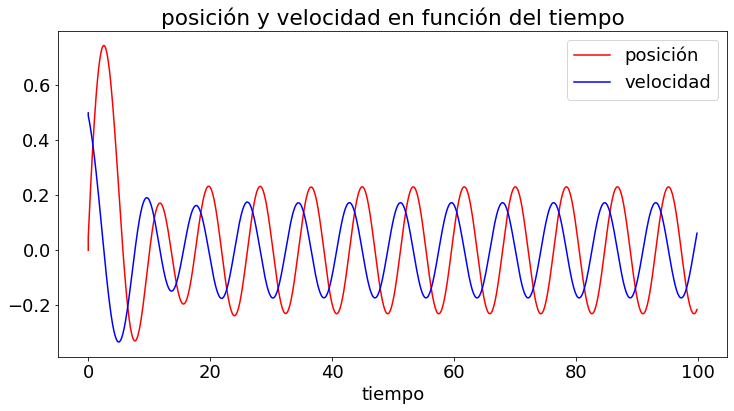

In [42]:
#Graficamos con matplotlib.pyplot
font = {'family' : 'sans',
        'size'   : 18}
plt.rc('font', **font)
plt.figure(figsize=(12,6))
plt.title("posición y velocidad en función del tiempo")
plt.xlabel("tiempo")
plt.plot(time,traj[:,0],'r-', label='posición') #para la trayectoria
plt.plot(time,traj[:,1],'b-', label='velocidad') #para la velocidad
plt.legend(loc='upper right');